In [1]:
!pip install yfinance


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import yfinance as yf

C:\Users\Hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
start='2017-08-01'
end='2024-07-31'
stock='AAPL'

data=yf.download(stock,start,end)

C:\Users\Hp\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,37.275002,37.555000,37.102501,37.512501,35.114544,141474400
2017-08-02,39.820000,39.937500,39.040001,39.285000,36.773724,279747200
2017-08-03,39.262501,39.302502,38.755001,38.892502,36.406326,108389200
2017-08-04,39.017502,39.349998,38.922501,39.097500,36.598217,82239600
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.164536,87481200
...,...,...,...,...,...,...
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.960007,41601300


In [4]:
df1=data.reset_index()['High']

In [5]:
df1.shape

(1760,)

In [6]:
df1

0        37.555000
1        39.937500
2        39.302502
3        39.349998
4        39.730000
           ...    
1755    224.800003
1756    220.850006
1757    219.490005
1758    219.300003
1759    220.330002
Name: High, Length: 1760, dtype: float64

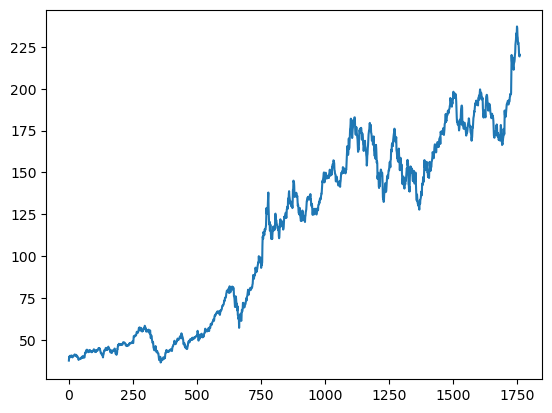

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np
import sklearn

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.00560259],
       [0.01746763],
       [0.01430529],
       ...,
       [0.91165343],
       [0.91070721],
       [0.91583668]])

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(1144, 616)

In [13]:
train_data

array([[0.00560259],
       [0.01746763],
       [0.01430529],
       ...,
       [0.69248007],
       [0.68052791],
       [0.66309763]])

In [14]:
import numpy
#convert an array of values into a matrix 
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [15]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train, y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [16]:
print(X_train)

[[0.00560259 0.01746763 0.01430529 ... 0.03919322 0.03693974 0.03697709]
 [0.01746763 0.01430529 0.01454182 ... 0.03693974 0.03697709 0.03772411]
 [0.01430529 0.01454182 0.01643426 ... 0.03697709 0.03772411 0.03697709]
 ...
 [0.5597112  0.53989043 0.53869526 ... 0.68560761 0.68486056 0.69183271]
 [0.53989043 0.53869526 0.54780874 ... 0.68486056 0.69183271 0.69830676]
 [0.53869526 0.54780874 0.55104584 ... 0.69183271 0.69830676 0.69248007]]


In [17]:
print(X_train.shape),print(y_train.shape)

(1043, 100)
(1043,)


(None, None)

In [18]:
print(X_test.shape),print(y_test.shape)

(515, 100)
(515,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM / 3D
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

17/17 [==============================] - 11s 224ms/step - loss: 0.0285 - val_loss: 0.0294
Epoch 2/100
17/17 [==============================] - 2s 127ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 3/100
17/17 [==============================] - 2s 126ms/step - loss: 8.3195e-04 - val_loss: 0.0021
Epoch 4/100
17/17 [==============================] - 2s 129ms/step - loss: 7.3530e-04 - val_loss: 0.0019
Epoch 5/100
17/17 [==============================] - 2s 133ms/step - loss: 6.7174e-04 - val_loss: 0.0021
Epoch 6/100
17/17 [==============================] - 2s 131ms/step - loss: 6.4947e-04 - val_loss: 0.0019
Epoch 7/100
17/17 [==============================] - 2s 130ms/step - loss: 6.7662e-04 - val_loss: 0.0022
Epoch 8/100
17/17 [==============================] - 2s 127ms/step - loss: 6.2533e-04 - val_loss: 0.0022
Epoch 9/100
17/17 [==============================] - 2s 129ms/step - loss: 6.3040e-04 - val_loss: 0.0017
Epoch 10/100
17/17 [==============================] - 2s 126m

In [24]:
import tensorflow as tf

In [25]:
tf.__version__

'2.15.0'

In [26]:
### lets do the prediction and check performance metrices
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 1s 31ms/step


In [27]:
### Transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

96.0910428925792

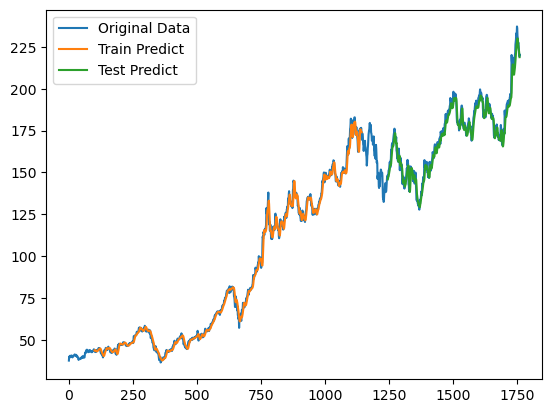

In [29]:
#shift train prediction for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test prediction for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["Original Data","Train Predict","Test Predict"]);
plt.show()

In [30]:
len(test_data)

616

In [31]:
x_input=test_data[516:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
x_input=test_data[516:].reshape(1,-1)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [34]:
temp_input

[0.6688246936454172,
 0.6836155367151893,
 0.6870020304904505,
 0.6852589721662736,
 0.6810757233762337,
 0.6866533884296202,
 0.6782370414180006,
 0.7035857053259521,
 0.6981075871556709,
 0.7083665393745728,
 0.7024900816918959,
 0.6803785152445604,
 0.6748506236327264,
 0.6722609608622311,
 0.6831175743297009,
 0.6762948133376258,
 0.6714143564159125,
 0.6619023857702366,
 0.6685756744576795,
 0.6747510007596339,
 0.6671314847527802,
 0.6612051776385633,
 0.6655876721747883,
 0.6606573658215352,
 0.6923805257876391,
 0.706822726796581,
 0.6982072100287634,
 0.6839143293444796,
 0.6684262781430342,
 0.6584163451118701,
 0.6472609390151098,
 0.6515438106782422,
 0.6504980364757258,
 0.6617032160140387,
 0.6682271083868363,
 0.6718625453598481,
 0.6952191317558851,
 0.6900398822048814,
 0.6786853063519233,
 0.6822211204518426,
 0.7498506131841033,
 0.7359063745606497,
 0.7393924152190163,
 0.7302789360657104,
 0.7381972447018547,
 0.7403386425384273,
 0.7503486515595786,
 0.75632473211

In [35]:
#demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
                                
print(lst_output)

[0.89985096]
101
1 day input [0.68361554 0.68700203 0.68525897 0.68107572 0.68665339 0.67823704
 0.70358571 0.69810759 0.70836654 0.70249008 0.68037852 0.67485062
 0.67226096 0.68311757 0.67629481 0.67141436 0.66190239 0.66857567
 0.674751   0.66713148 0.66120518 0.66558767 0.66065737 0.69238053
 0.70682273 0.69820721 0.68391433 0.66842628 0.65841635 0.64726094
 0.65154381 0.65049804 0.66170322 0.66822711 0.67186255 0.69521913
 0.69003988 0.67868531 0.68222112 0.74985061 0.73590637 0.73939242
 0.73027894 0.73819724 0.74033864 0.75034865 0.75632473 0.76802787
 0.77026897 0.76882471 0.7743526  0.77838645 0.77883471 0.76977093
 0.76767931 0.77973109 0.77599603 0.77564739 0.77758969 0.78964148
 0.79128491 0.79915337 0.79716137 0.79935262 0.80114545 0.85024904
 0.91518925 0.89800799 0.89013945 0.90896415 0.90737056 0.88550801
 0.8738048  0.87783865 0.87126498 0.88859564 0.89297813 0.89462157
 0.90179282 0.9160857  0.92191239 0.94631475 0.9532869  0.96100597
 0.9793327  0.97589643 0.97714145

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
import matplotlib.pyplot as plt

In [38]:
len(df1)

1760

In [39]:
df3=df1.tolist()
df3.extend(lst_output)

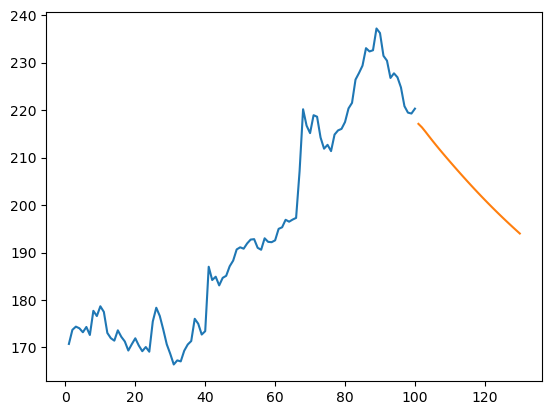

In [40]:
plt.plot(day_new,scaler.inverse_transform(df1[1660:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

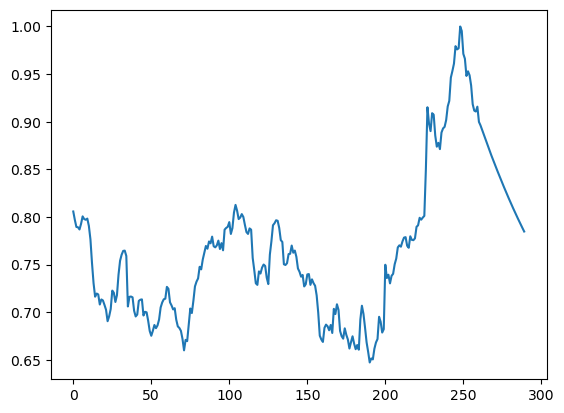

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

In [42]:
start='2017-08-01'
end='2024-07-31'
stock='AMZN'

data1=yf.download(stock,start,end)

C:\Users\Hp\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [43]:
df2=data1.reset_index()['High']

In [44]:
df2

0        50.320000
1        50.160500
2        49.974998
3        49.583500
4        49.750000
           ...    
1755    185.449997
1756    183.899994
1757    183.190002
1758    184.750000
1759    185.860001
Name: High, Length: 1760, dtype: float64

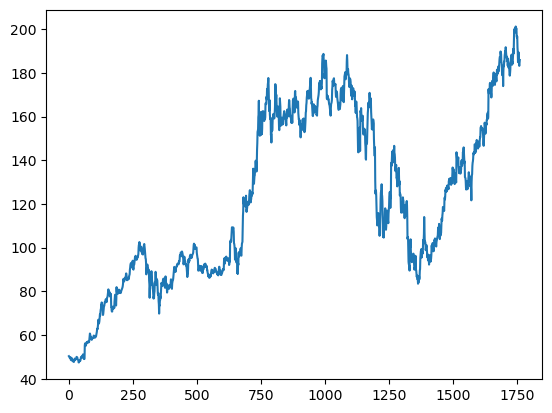

In [45]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [47]:
df2

array([[0.01878473],
       [0.01774746],
       [0.01654109],
       ...,
       [0.88287592],
       [0.89302102],
       [0.90023967]])

In [48]:
##splitting dataset into train and test split
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [49]:
training_size,test_size

(1144, 616)

In [50]:
train_data

array([[0.01878473],
       [0.01774746],
       [0.01654109],
       ...,
       [0.73672442],
       [0.72556149],
       [0.72197494]])

In [51]:
import numpy
#convert an array of values into a matrix 
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [52]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train, y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [53]:
print(X_train)

[[0.01878473 0.01774746 0.01654109 ... 0.08003914 0.0794506  0.07881003]
 [0.01774746 0.01654109 0.01399507 ... 0.0794506  0.07881003 0.07496334]
 [0.01654109 0.01399507 0.01507786 ... 0.07881003 0.07496334 0.07348384]
 ...
 [0.82877183 0.8032757  0.79049677 ... 0.73986869 0.74956507 0.74372188]
 [0.8032757  0.79049677 0.79352078 ... 0.74956507 0.74372188 0.75700163]
 [0.79049677 0.79352078 0.80651434 ... 0.74372188 0.75700163 0.73672442]]


In [54]:
print(X_train.shape),print(y_train.shape)

(1043, 100)
(1043,)


(None, None)

In [55]:
print(X_test.shape),print(y_test.shape)

(515, 100)
(515,)


(None, None)

In [56]:
# reshape input to be [samples, time steps, features] which is required for LSTM / 3D
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [57]:
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 10s 225ms/step - loss: 0.0584 - val_loss: 0.0162
Epoch 2/100
17/17 [==============================] - 2s 121ms/step - loss: 0.0055 - val_loss: 0.0062
Epoch 3/100
17/17 [==============================] - 2s 127ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 4/100
17/17 [==============================] - 2s 128ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 5/100
17/17 [==============================] - 2s 130ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 6/100
17/17 [==============================] - 2s 128ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 7/100
17/17 [==============================] - 2s 130ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 8/100
17/17 [==============================] - 2s 134ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 9/100
17/17 [==============================] - 2s 130ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 10/100
17/17 [==============================] - 2s 128ms/step - loss: 0.0015 - val_l

In [60]:
### lets do the prediction and check performance metrices
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 1s 31ms/step


In [61]:
### Transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [62]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

128.3435689138363

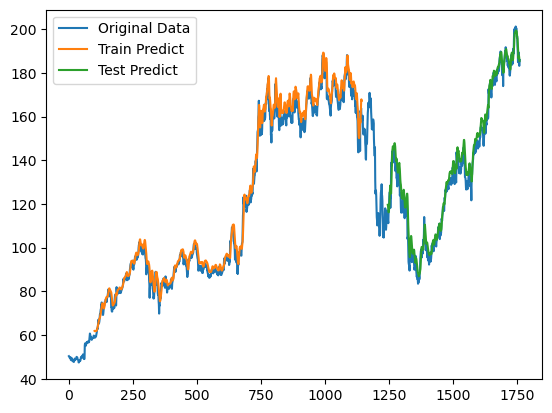

In [63]:
#shift train prediction for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df2)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test prediction for plotting
testPredictPlot=numpy.empty_like(df2)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1,:]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["Original Data","Train Predict","Test Predict"]);
plt.show()

In [64]:
len(test_data)

616

In [65]:
x_input=test_data[516:].reshape(1,-1)
x_input.shape

(1, 100)

In [66]:
x_input=test_data[516:].reshape(1,-1)

In [67]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [68]:
temp_input

[0.849058865519233,
 0.8542614122446455,
 0.8261672828449897,
 0.8410597564260862,
 0.8466525834649008,
 0.8590738771210917,
 0.8486685852058309,
 0.8406045782421108,
 0.8367025689658334,
 0.8525705944821083,
 0.8713650773394821,
 0.8573179630235452,
 0.8685687134361837,
 0.8650568852410905,
 0.8621304278999915,
 0.8731859885398201,
 0.8816402758169424,
 0.8672679775226126,
 0.8807948173195648,
 0.8952972090516951,
 0.9029060378314397,
 0.909539314676006,
 0.9098644986543987,
 0.9029060378314397,
 0.9256675270678822,
 0.9166279681689837,
 0.9186439699099138,
 0.8935412949541484,
 0.8918504771916111,
 0.8776732694378735,
 0.855627145261008,
 0.8547816867636302,
 0.8616751504837981,
 0.8642115259759309,
 0.8225904575471052,
 0.8674631672954227,
 0.8850870076770261,
 0.8815752787141509,
 0.8956222937978697,
 0.8952972090516951,
 0.9133112305144826,
 0.919034150991098,
 0.9267730732086432,
 0.9169530529151586,
 0.938218814929656,
 0.9264478892302506,
 0.9161726907527903,
 0.912335777811522

In [69]:
#demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
                                
print(lst_output)

[0.90253246]
101
1 day input [0.85426141 0.82616728 0.84105976 0.84665258 0.85907388 0.84866859
 0.84060458 0.83670257 0.85257059 0.87136508 0.85731796 0.86856871
 0.86505689 0.86213043 0.87318599 0.88164028 0.86726798 0.88079482
 0.89529721 0.90290604 0.90953931 0.9098645  0.90290604 0.92566753
 0.91662797 0.91864397 0.89354129 0.89185048 0.87767327 0.85562715
 0.85478169 0.86167515 0.86421153 0.82259046 0.86746317 0.88508701
 0.88157528 0.89562229 0.89529721 0.91331123 0.91903415 0.92677307
 0.91695305 0.93821881 0.92644789 0.91617269 0.91233578 0.9058325
 0.90966941 0.89659785 0.90550731 0.88333109 0.89607757 0.89308602
 0.87799845 0.87669782 0.88866383 0.8708448  0.85699288 0.85367614
 0.86095988 0.87188535 0.89464684 0.90303603 0.90914913 0.91266096
 0.91643288 0.91201059 0.88632265 0.89464684 0.89002947 0.90446676
 0.92248088 0.93366654 0.91961942 0.95837903 0.99115553 0.98471735
 0.98114052 0.99499244 0.99239117 0.99577291 1.         0.995903
 0.99291145 0.99395199 0.9692395  0.

In [70]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [71]:
import matplotlib.pyplot as plt

In [72]:
df4=df2.tolist()
df4.extend(lst_output)

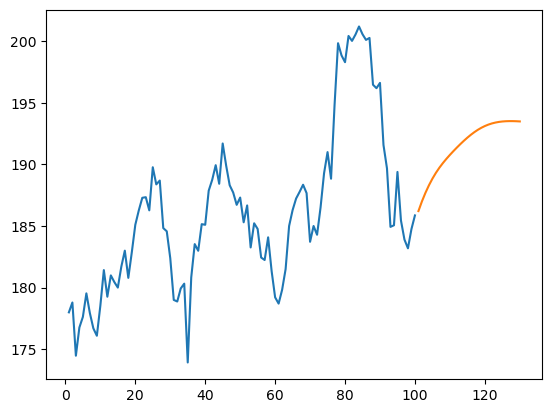

In [73]:
plt.plot(day_new,scaler.inverse_transform(df2[1660:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [74]:
len(df2)

1760

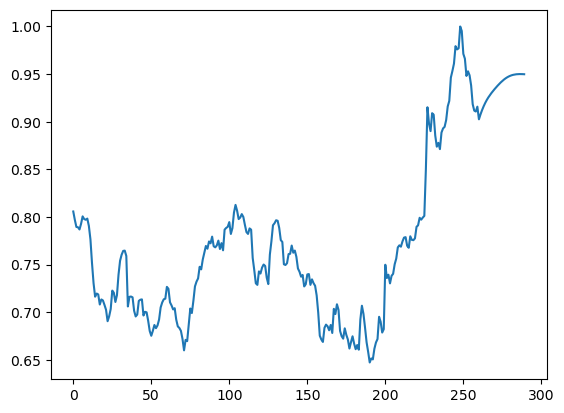

In [75]:
df4=df1.tolist()
df4.extend(lst_output)
plt.plot(df4[1500:])

In [76]:
start='2017-08-01'
end='2024-07-31'
stock='NVDA'

data2=yf.download(stock,start,end)

C:\Users\Hp\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [77]:
df5=data2.reset_index()['High']

In [78]:
df5

0         4.114000
1         4.147750
2         4.165750
3         4.251750
4         4.309250
           ...    
1755    119.949997
1756    116.629997
1757    116.199997
1758    116.279999
1759    111.989998
Name: High, Length: 1760, dtype: float64

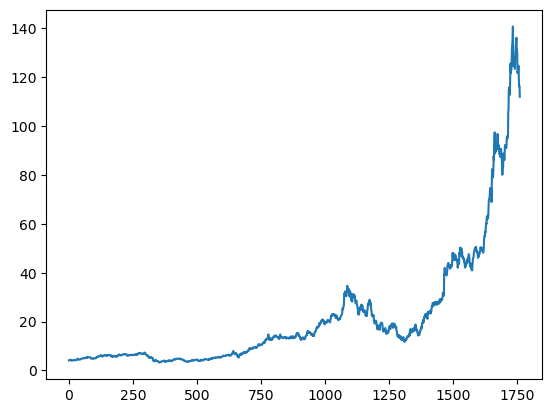

In [79]:
import matplotlib.pyplot as plt
plt.plot(df5)

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df5=scaler.fit_transform(np.array(df5).reshape(-1,1))

In [81]:
##splitting dataset into train and test split
training_size=int(len(df5)*0.65)
test_size=len(df5)-training_size
train_data,test_data=df5[0:training_size,:],df5[training_size:len(df5),:1]

In [82]:
training_size,test_size

(1144, 616)

In [83]:
train_data

array([[0.00628679],
       [0.00653223],
       [0.00666313],
       ...,
       [0.17217231],
       [0.16655093],
       [0.15726436]])

In [84]:
import numpy
#convert an array of values into a matrix 
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [85]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train, y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [86]:
print(X_train)

[[0.00628679 0.00653223 0.00666313 ... 0.01236996 0.01231724 0.01237905]
 [0.00653223 0.00666313 0.00728853 ... 0.01231724 0.01237905 0.01235724]
 [0.00666313 0.00728853 0.00770668 ... 0.01237905 0.01235724 0.01193909]
 ...
 [0.13869123 0.13223355 0.13217536 ... 0.15551904 0.15949691 0.15984598]
 [0.13223355 0.13217536 0.13606597 ... 0.15949691 0.15984598 0.17071788]
 [0.13217536 0.13606597 0.14024748 ... 0.15984598 0.17071788 0.17217231]]


In [87]:
print(X_train.shape),print(y_train.shape)

(1043, 100)
(1043,)


(None, None)

In [88]:
print(X_test.shape),print(y_test.shape)

(515, 100)
(515,)


(None, None)

In [89]:
# reshape input to be [samples, time steps, features] which is required for LSTM / 3D
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [90]:
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 10s 208ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 2/100
17/17 [==============================] - 2s 124ms/step - loss: 1.6388e-04 - val_loss: 0.0019
Epoch 3/100
17/17 [==============================] - 2s 126ms/step - loss: 8.4030e-05 - val_loss: 0.0025
Epoch 4/100
17/17 [==============================] - 2s 125ms/step - loss: 6.9196e-05 - val_loss: 0.0032
Epoch 5/100
17/17 [==============================] - 2s 129ms/step - loss: 6.3505e-05 - val_loss: 0.0053
Epoch 6/100
17/17 [==============================] - 2s 130ms/step - loss: 7.3304e-05 - val_loss: 0.0031
Epoch 7/100
17/17 [==============================] - 2s 128ms/step - loss: 6.0039e-05 - val_loss: 0.0054
Epoch 8/100
17/17 [==============================] - 2s 127ms/step - loss: 6.1656e-05 - val_loss: 0.0068
Epoch 9/100
17/17 [==============================] - 2s 125ms/step - loss: 6.3440e-05 - val_loss: 0.0068
Epoch 10/100
17/17 [==============================] - 2s 1

In [93]:
### lets do the prediction and check performance metrices
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 0s 20ms/step


In [94]:
### Transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [95]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

12.672213555028458

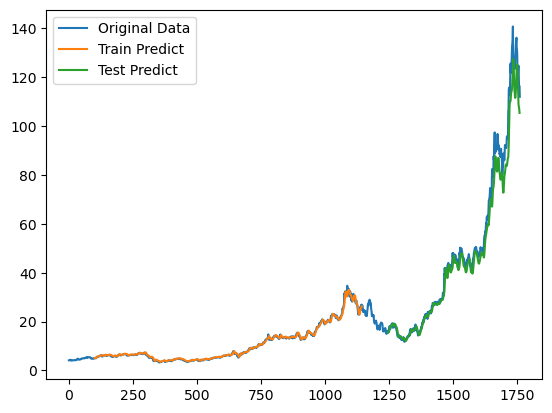

In [96]:
#shift train prediction for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df5)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test prediction for plotting
testPredictPlot=numpy.empty_like(df5)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df5)-1,:]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df5))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["Original Data","Train Predict","Test Predict"]);
plt.show()

In [97]:
x_input=test_data[516:].reshape(1,-1)
x_input.shape

(1, 100)

In [98]:
x_input=test_data[516:].reshape(1,-1)

In [99]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [100]:
temp_input

[0.650986665413507,
 0.6846786629057708,
 0.6221161327608009,
 0.6451180281894912,
 0.6418019083290118,
 0.6355624276050639,
 0.6275629937600286,
 0.648354142615066,
 0.6348206296406573,
 0.6338461945135916,
 0.6501213084313943,
 0.6656110153197178,
 0.6800680861786074,
 0.6772246752677722,
 0.6544263997739638,
 0.6403184233647411,
 0.6470451493933576,
 0.631548174327522,
 0.6335843736763415,
 0.6354751539926471,
 0.6198181680570023,
 0.6223561490655146,
 0.6136659054632,
 0.6119569405492398,
 0.6362387010073189,
 0.6321372295996314,
 0.6353224113003502,
 0.6171783215987781,
 0.6219561773732628,
 0.603157618801972,
 0.5895877094577318,
 0.5586737092786939,
 0.5782794794120003,
 0.5878278673011866,
 0.5823082690445665,
 0.6187273311252002,
 0.6162620318918093,
 0.62227614363061,
 0.6017758883228712,
 0.6034993895918557,
 0.6256358725561622,
 0.6470088085057969,
 0.6438163031452949,
 0.6395475526902861,
 0.6386603356933659,
 0.6410528976693644,
 0.6381222131461125,
 0.6428709407282777,
 

In [101]:
#demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
                                
print(lst_output)

[0.7216446]
101
1 day input [0.68467866 0.62211613 0.64511803 0.64180191 0.63556243 0.62756299
 0.64835414 0.63482063 0.63384619 0.65012131 0.66561102 0.68006809
 0.67722468 0.6544264  0.64031842 0.64704515 0.63154817 0.63358437
 0.63547515 0.61981817 0.62235615 0.61366591 0.61195694 0.6362387
 0.63213723 0.63532241 0.61717832 0.62195618 0.60315762 0.58958771
 0.55867371 0.57827948 0.58782787 0.58230827 0.61872733 0.61626203
 0.62227614 0.60177589 0.60349939 0.62563587 0.64700881 0.6438163
 0.63954755 0.63866034 0.6410529  0.63812221 0.64287094 0.66622188
 0.67318135 0.66533466 0.66867985 0.67013432 0.67464303 0.74954643
 0.7506736  0.8122253  0.81624677 0.81862479 0.79606653 0.81266888
 0.82430435 0.86683928 0.88965936 0.86133427 0.87157347 0.8699009
 0.89906227 0.92029705 0.94240441 0.94887664 0.96778433 1.
 0.92633297 0.88146363 0.89629886 0.90807975 0.89564439 0.90509819
 0.88422703 0.87382788 0.90924332 0.91338851 0.92735107 0.94953122
 0.95883959 0.96647528 0.93571402 0.93185978 

In [102]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [103]:
import matplotlib.pyplot as plt

In [104]:
df6=df5.tolist()
df6.extend(lst_output)

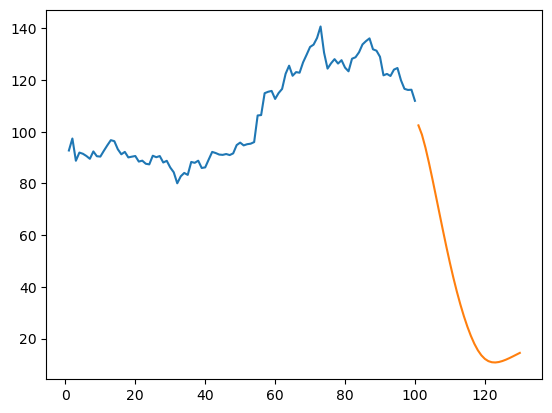

In [105]:
plt.plot(day_new,scaler.inverse_transform(df5[1660:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

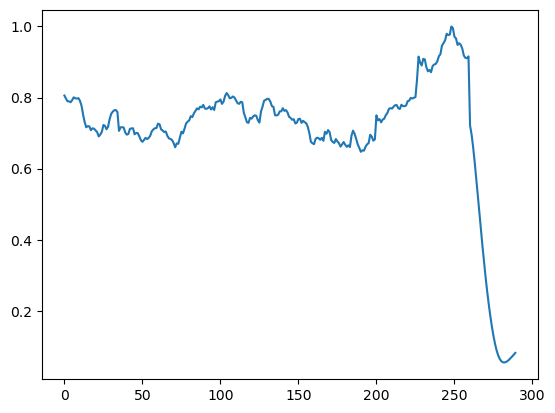

In [106]:
df6=df1.tolist()
df6.extend(lst_output)
plt.plot(df6[1500:])

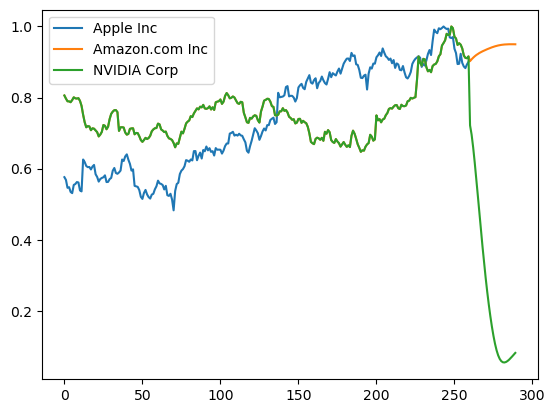

In [107]:
plt.plot(df2[1500:])
plt.plot(df4[1500:])
plt.plot(df6[1500:])
plt.legend(["Apple Inc","Amazon.com Inc","NVIDIA Corp"]);
plt.show()